<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/DataScience3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACHINE LEARNING 11/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])


In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
 #Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

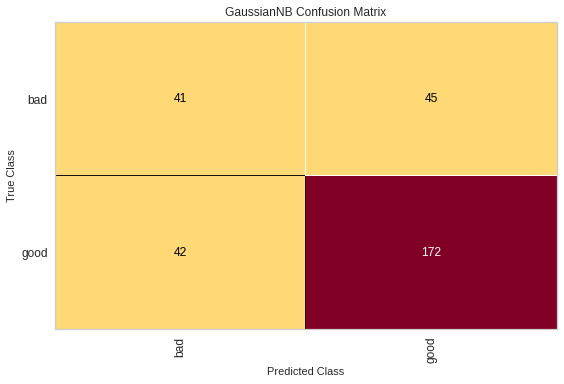

In [ ]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape
#novo_credito

(1, 20)

In [ ]:
'''previsores=novo_credito.iloc[:,0:20].values #pegandos os previsores da classe
classe=novo_credito.iloc[:,20].values #classe em registro diferente'''

In [ ]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
#novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelEncoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelEncoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelEncoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelEncoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelEncoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelEncoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelEncoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelEncoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelEncoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelEncoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelEncoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelEncoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelEncoder13.transform(novo_credito[:, 19])

In [ ]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [ ]:
#arvore de decisao 12/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamentoA, X_teste, y_treinamentoA, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [ ]:

#modelo de treino com tree
arv=DecisionTreeClassifier()
arv.fit(X_treinamentoA,y_treinamentoA)

DecisionTreeClassifier()

In [ ]:
#exportacao da arv em .dot pra vizualizar
export_graphviz(arv, out_file='tree.dot')

In [ ]:
#previsoes
previsoe=arv.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#taxa de acerto
taxa_acerto2=accuracy_score(y_teste,previsoes)
taxa_acerto2

0.71

In [ ]:
#erro
taxa_erro=1- taxa_acerto2
taxa_erro

0.29000000000000004

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
pvs=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [ ]:
#criacao do modelo de treinamento com vetor de suporte
svm=SVC()
svm.fit(X_treino,y_treinamento)

SVC()

In [ ]:
#previsoes de treino
previsores=svm.predict(X_treino)
previsores

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

In [ ]:
'''taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto'''

In [ ]:
forest= ExtraTreesClassifier()
forest.fit(X_treino, y_treinamento)
importancias= forest.feature_importances_
importancias

array([0.10279421, 0.0803875 , 0.0670761 , 0.0611044 , 0.0816487 ,
       0.05487028, 0.04996379, 0.05453965, 0.04344835, 0.02842405,
       0.04816835, 0.0462817 , 0.07072119, 0.0423491 , 0.03476832,
       0.03418078, 0.04014703, 0.02168586, 0.03124591, 0.00619471])

In [ ]:
X_treino=X_treino[:[0,1,2,3]]
X_teste

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , accuracy_score
from scipy import stats
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iristemp=pd.read_csv('iris.csv')
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris=datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
#organizou em nums as classe
#iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#indep é previsoreN , dep é a classe
previsoesN=iris.data 
classe=iris.target

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(previsoesN,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
len(X_teste2)

45

In [ ]:
#mtd pra metodo olhar qntos vizinhos + proximos vai relacionar no modelo
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino2,y_treino2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#45 previsoes dos registros
previsoesN=knn.predict(X_teste2)
previsoesN

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
#matrix com o y_teste e previsoes #diag principal sao os acertos , houve 1 erro
confusaoN=confusion_matrix(y_teste2,previsoesN)
confusaoN

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [ ]:
#taxas de acerto e erro
taxa_acertoN = accuracy_score(y_teste2, previsoesN)
taxa_erroN = 1 - taxa_acertoN
taxa_acertoN

0.9777777777777777

In [ ]:
#ensamble learning com random forest
#gera varios modelos(trees conforme parametro definido) variando em termo de config , pra ver qual melhor votando pela performance

In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
creditorf = pd.read_csv('Credit.csv')
creditorf.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsoresrf = creditorf.iloc[:,0:20].values
classerf = creditorf.iloc[:,20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsoresrf[:,0] = labelencoder.fit_transform(previsoresrf[:,0])
previsoresrf[:,2] = labelencoder.fit_transform(previsoresrf[:,2])
previsoresrf[:, 3] = labelencoder.fit_transform(previsoresrf[:, 3])
previsoresrf[:, 5] = labelencoder.fit_transform(previsoresrf[:, 5])
previsoresrf[:, 6] = labelencoder.fit_transform(previsoresrf[:, 6])
previsoresrf[:, 8] = labelencoder.fit_transform(previsoresrf[:, 8])
previsoresrf[:, 9] = labelencoder.fit_transform(previsoresrf[:, 9])
previsoresrf[:, 11] = labelencoder.fit_transform(previsoresrf[:, 11])
previsoresrf[:, 13] = labelencoder.fit_transform(previsoresrf[:, 13])
previsoresrf[:, 14] = labelencoder.fit_transform(previsoresrf[:, 14])
previsoresrf[:, 16] = labelencoder.fit_transform(previsoresrf[:, 16])
previsoresrf[:, 18] = labelencoder.fit_transform(previsoresrf[:, 18])
previsoresrf[:, 19] = labelencoder.fit_transform(previsoresrf[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinorf, X_testerf, y_treinorf, y_testerf = train_test_split(previsoresrf,
                                                                  classerf,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto,n_estimators num de arv aleatorias criadas
floresta = RandomForestClassifier(n_estimators = 20)
floresta.fit(X_treinorf, y_treinorf)

RandomForestClassifier(n_estimators=50)

In [ ]:
# Visualização dos atributos principais,ver tds as variacoes geradas
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=1661209425),
 DecisionTreeClassifier(max_features='auto', random_state=51720974),
 DecisionTreeClassifier(max_features='auto', random_state=698629682),
 DecisionTreeClassifier(max_features='auto', random_state=1254391408),
 DecisionTreeClassifier(max_features='auto', random_state=585904218),
 DecisionTreeClassifier(max_features='auto', random_state=1396742071),
 DecisionTreeClassifier(max_features='auto', random_state=296186212),
 DecisionTreeClassifier(max_features='auto', random_state=1650825386),
 DecisionTreeClassifier(max_features='auto', random_state=1591366532),
 DecisionTreeClassifier(max_features='auto', random_state=58187894),
 DecisionTreeClassifier(max_features='auto', random_state=616070370),
 DecisionTreeClassifier(max_features='auto', random_state=3419731),
 DecisionTreeClassifier(max_features='auto', random_state=2036027058),
 DecisionTreeClassifier(max_features='auto', random_state=1877483932),
 DecisionTreeClas

In [ ]:
previsoesrf = floresta.predict(X_testerf)
confusao = confusion_matrix(y_testerf, previsoesrf)
taxa_acertorf = accuracy_score(y_testerf, previsoesrf)
taxa_acertorf

0.7666666666666667

In [ ]:
#kmeans usa distancia euclidiana para agrupar usuarios , atraves de num de clusters previamente definido

In [ ]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Carregamento da base de dados 
iris = datasets.load_iris()
# visualização de quantos registros existem por classe,tarefa ñ supervisionada
unicosk, quantidadek = np.unique(iris.target, return_counts = True) #conta qtd de registros na classe
unicosk

array([0, 1, 2])

In [ ]:
quantidadek

array([50, 50, 50])

In [ ]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados),define aq o num de clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data) #ñ usa target

KMeans(n_clusters=3)

In [ ]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# Visualização dos grupos que cada registro foi associado,ñ é previsao é agrupamento
previsoesk = cluster.labels_
previsoesk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Contagem dos registros por classe
unicosk2, quantidadek2 = np.unique(previsoesk, return_counts = True)
unicosk2

array([0, 1, 2], dtype=int32)

In [ ]:
quantidadek2 #mudou agrupamento , ñ coincndo com classes reais

array([62, 50, 38])

In [ ]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultadosk = confusion_matrix(iris.target, previsoesk)
resultadosk

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

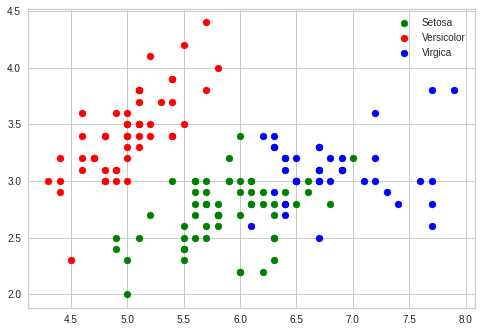

In [ ]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoesk == 0, 0], iris.data[previsoesk == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoesk == 1, 0], iris.data[previsoesk == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoesk == 2, 0], iris.data[previsoesk == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()

In [ ]:
#C-MEANS=define num de clusters e com dist de euclides ele associa elementos aos centros ajustando-os até forma definitiva 
#ñ atribui instancia absoluta ao cluster , atribuicao é proporcional(ex:70% ao cluster 1 etc)

In [ ]:
!pip install -U scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=13fbed98c71f31620f3c897863c08893d06fe4767bf1d9f5033a818f9196169f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
 #Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import skfuzzy
#

In [ ]:
# Carregamento da base de dados iris, que já está disponível no sklearn e coloca obj iris
iris = datasets.load_iris()

In [ ]:
# Aplicação do algoritmo definindo três cluster (c = 3) e passando a matriz transposta (iris.data.T). Os outros parâmetros são obrigatórios e são os dc efault indicados na documentação
#tem q passar matrix transp pro cluster e c é o num de clusters
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005,
                   maxiter = 1000, init = None) 

In [ ]:
# Obtendo as porcentagens de um registros pertencer a um cluster, que está na posição 1 da matriz retornada
previsoes_porcentagem = r[1] #posicao 1 da pctg dos clusters

In [ ]:
# Visualização da probabilidade de um registro pertencer a cada um dos cluster (o somatório é 1.0 que indica 100%)
for x in range(150):
  print( previsoes_porcentagem[0][x] ,previsoes_porcentagem[1][x] ,previsoes_porcentagem[2][x] )

0.996623648101864 0.0010718900492563868 0.0023044618488795563
0.9758344356432936 0.007502469072697833 0.016663095284008313
0.9798141251601632 0.006417500964095765 0.013768373875740958
0.9674034608869867 0.010113466099689057 0.022483073013324213
0.9944699230117076 0.0017678773798651556 0.003762199608427262
0.9345353843415768 0.02063001299044063 0.04483460266798255
0.9794794116376553 0.006507590200508871 0.014012998161835717
0.9995469331641795 0.00014128898194394932 0.0003117778538764827
0.9303341119314014 0.021913636722716248 0.04775225134588247
0.9827092969520647 0.005344991631333609 0.01194571141660178
0.9680254208587454 0.010205329165302354 0.02176924997595208
0.9921303838922019 0.0024328111235229154 0.005436804984275196
0.9706196151168373 0.009182261960349242 0.02019812292281361
0.9229284162421761 0.025246608093456243 0.051824975664367584
0.8897142945191054 0.03764507234263659 0.07264063313825804
0.841281951111997 0.054326045256094045 0.10439200363190888
0.9469013667746619 0.0175021

In [ ]:
# Geração de matriz de contingência para comparação com as classes originais da base de dados
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0,  3, 47],
       [ 0, 37, 13]])

In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=9003e0b8787d0621e2a572ab2240acbe8333958ae7e3978e2c76213fdf9aab31
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [ ]:
#centros sao por pontos reais de dados

In [ ]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
#pip install pyclustering (executar no Anaconda Prompt)

In [ ]:
# Carregamento da base de dados
iris = datasets.load_iris()

In [ ]:
# Configuração dos parâmetros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas
# 3, 12 e 20 são índices aleatórios de registros da base de dados (inicialização)
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])#mdoids definidos , sao os indices dos registros
# Visualização dos pontos escolhidos (3, 12 e 20)
cluster.get_medoids()

[3, 12, 20]

In [ ]:
# Aplicação do algoritmo para o agrupamento, obtenção dos grupo de cada registro e visualização dos medoides
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
#lista de 3 elementos, com os indices dos registros do cluster cada lista é um cluster ,cada indice é um dado
previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

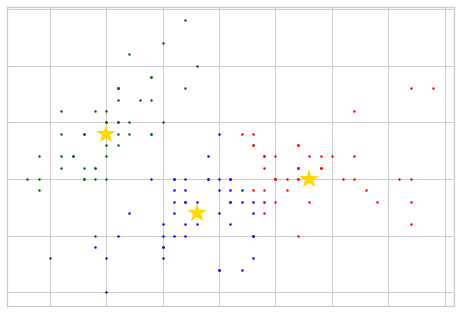

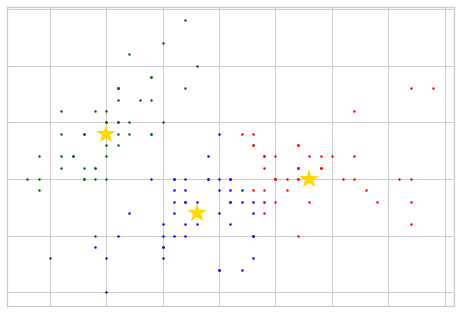

In [ ]:
# Visualização do agrupamento, grafico do cluster com os centoids com tds os dados das 2 primeiras cols
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

In [ ]:
# Código para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência==matrix de confusao
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

In [ ]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])

In [ ]:
#REGRAS DE ASSOSIACAO

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=cd85a8be8cb1a2f6b50cb27552a0198616dc200931081f5cca186e5ed788ed58
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
# Importação das bibliotecas
import pandas as pd
from apyori import apriori
#pip install apyori (executar no Anaconda Prompt)

In [ ]:
# Leitura das trasações 
dados = pd.read_csv('transacoes.txt', header = None)
dados

,0,1,2
0,Cerveja,Pizza,Sorvete
1,Pizza,Sorvete,NaN
2,Cerveja,Pizza,NaN
3,Cerveja,Pizza,Sorvete
4,Cerveja,Pizza,NaN
5,Pizza,NaN,NaN


In [ ]:
#transformação para o formato de lista, que é exigido pela biblioteca apyori - 6 é a quantidade de itens na base de dados
#for pra add transacoes na lista
transacoes = []
for i in range(0,6):
    transacoes.append([str(dados.values[i,j]) for j in range(0,3)])
transacoes

[['Cerveja', 'Pizza', 'Sorvete'],
 ['Pizza', 'Sorvete', 'nan'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Cerveja', 'Pizza', 'Sorvete'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Pizza', 'nan', 'nan']]

In [ ]:
# Execução do algoritmo apriori para geração das regras de associação, definindo os parâmetros de suporte e confiança
regras = apriori(transacoes, min_support = 0.5, min_confidence = 0.5,min_length=2) #valores dependem dos dados

In [ ]:
# Criação de nova variável para armazenar somente as regras de associação
resultados = list(regras)
print(resultados[0])
resultados

RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)])


[RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Sorvete'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza', 'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza', 'Cerveja'}), confidence=0.6666666666666666, li

In [ ]:
# Criação de nova variável, percorrendo a variável anterior para uma melhor visualização dos resultados
resultados2 = [list(x) for x in resultados]
resultados2

[[frozenset({'Cerveja'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Pizza'}),
  1.0,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]],
 [frozenset({'Sorvete'}),
  0.5,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]],
 [frozenset({'nan'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Cerveja', 'Pizza'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza', 'Cerveja'}), confidence=0.6666666666666666, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Cerveja'}), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Pizza'}), items_add=frozenset({'Cerveja'}), confi

In [ ]:
# Criação de outra variável para a visualização das regras ficar mais fácil para o usuário, adicionando as regras encontradas na variável resultados2
resultados3 = []
for j in range(0,7):
    resultados3.append([list(x) for x in resultados2[j][2]])
resultados3 #aq vemos confianca e lift 

[[[frozenset(), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Sorvete'}), 0.5, 1.0]],
 [[frozenset(), frozenset({'nan'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Cerveja', 'Pizza'}), 0.6666666666666666, 1.0],
  [frozenset({'Cerveja'}), frozenset({'Pizza'}), 1.0, 1.0],
  [frozenset({'Pizza'}), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'Sorvete'}), 0.5, 1.0],
  [frozenset({'Pizza'}), frozenset({'Sorvete'}), 0.5, 1.0],
  [frozenset({'Sorvete'}), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'Pizza'}), frozenset({'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'nan'}), frozenset({'Pizza'}), 1.0, 1.0]]]

In [ ]:
#ECAT associador q mostra a frequencia dos itens

In [ ]:
# Função pronta para o algoritmo ECLAT (atualmente o algoritmo não está disponível em uma biblioteca)
import os;
import sys;
import numpy as np;
import datetime as dt;
from numpy import linalg as LA;
import optparse;
import argparse;

In [ ]:
# Global variable 
#containing all frequent patterns with its tid's
F =[];
# Time calculation
#start_time =0;
#end_time=0;

# Pattern class:
class Pattern:
	def __init__(self, item, tids):
		# list of item Id's in the pattern
		self.item_id = item;
		# tid of the pattern
		self.tid_list = tids;

	# union operation of item Id's for two patterns to get ID of candidate pattern
	def 	union_id(self,next_node):
		t = set(self.item_id);
		tt = set(next_node.item_id);
		new = t | tt;
		new_id = list(new);
		new_id.sort();
		return new_id;

    # intersection of tid's of two patterns to find tid of candidate pattern
	def 	intersec_tid_list(self,next_node):
		t = set(self.tid_list);
		tt = set(next_node.tid_list);
		new = t & tt;
		new_list = list(new);
		new_list.sort();
		return new_list;
	
	# returns support value for the pattern
	def	getSup(self):
		return len(self.tid_list);
	
	
#	def	compare(self,n):
#		if self.item_id == n.item_id:
#			return 1;
#		return 0;

	#Candidate generation & check for support	
	def	generate_check(self, n , minsup):
		
		# generating tid_list first
		temp_tid_list = self.intersec_tid_list(n);
		
		# if support for new candidate is >= minsup then only generate ID for that candidate		
		if len(temp_tid_list) >= minsup:
			temp_id = self.union_id(n);
			return (temp_id,temp_tid_list);
		else:
			return ([],[]);
	def	pattern_print(self):
		pattern_ID = str("");
		for i in self.item_id:
			pattern_ID = pattern_ID + str(i) + ' ';
		print(pattern_ID + '\t\t : ' + str(self.tid_list)); 
			
#End of Pattern class

In [ ]:
# Pattern Store class:
class PatternStore:
	def 	__init__(self):
		self.Pattern_list = [];
	
	# Add a whole group of pattern to the list
	def	addGroup(self,list_nodes):
		for n in list_nodes:
			self.Pattern_list.append(n);

	# Retursn i_th pattern from the list if available
	def	getNode(self,index):
		if index < len(self.Pattern_list):
			return self.Pattern_list[index];
		else:
			return [];
	
	# To Fallow DFS method: Recursive function is used - to calculate all frequent patterns from the 1st level frequent list
	def 	Eclat(self,minsup):
		for node in self.Pattern_list:
			F.append(node);
			new_P = PatternStore();
			# As all patterns are sorted initially get only next pattern from the current
			index = self.Pattern_list.index(node);
			i = index +1;
			n = self.getNode(i);
			
			while n:
				# Here I am doing 2 steps togather: 1- candidate generation & 2- checking for minsup
				(temp_id,temp_tid_list) = node.generate_check(n,minsup);
				# if temp_id is not empty				
				if temp_id:				
					new_P.Pattern_list.append(Pattern(temp_id,temp_tid_list));
				i = i +1;
				# get next node from the list
				n = self.getNode(i);
			# if any possible pattern child go to child first, DFS
			if new_P.Pattern_list:
				new_P.Eclat(minsup);

#End of PatternStore class

In [ ]:
class DBReader:

	def	__init__(self,filetoread):
		self.file_id = filetoread;
	def	readFile(self):
		# stores each transaction
		self.trans=[];
		# stores no of items in each tansaction
		self.no_items = [];
		for	line	in	self.file_id:
			tuplex=line.split(" ");
			mylist=[];
			self.no_items.append(tuplex[0]);
			for	position	in	range(1,len(tuplex)):
				mylist.append(tuplex[position]);	
	
			self.trans.append(mylist);

	# From transactions: generate patterns and prepare a list
	def	genPatternList(self):
		#all items
		temp = [item for sublist in self.trans for item in sublist];

		#removing duplicates
		my_set = set(temp)
		self.items = list(my_set)

		#put in sorted oirder
		self.items.sort();
		
		# generate level_1 pattern list
		self.level_1 = [];

		# Start the timmer as candidate generation for level 1 is a part of Eclat algorithm.
		start_time = dt.datetime.now();		
		
		#generate all candidates for level 1
		for it in self.items:
			item = [];
			item.append(it)
			self.level_1.append(Pattern(item,[]));	
		
		# generate tid_list for every items in level 1 
		i=0;
		for t in self.trans:
			i = i + 1;
			t.sort();
			for it_id in t:
				index = self.items.index(it_id);
				self.level_1[index].tid_list.append(i);
	
		return start_time;

	# returns frequent patterns
	def	getFrequent(self,minsup):
		self.P = [];
		for n in self.level_1:
			c = int(n.getSup());
			if  c >= minsup:
				#print c;
				self.P.append(n);
		return self.P;

#End of DBReader class

In [ ]:
def main(file, support):
	#printing flag
	p_flag = 1;

	#parser = optparse.OptionParser("usage: %prog [options] arg1 arg2")
	#parser.add_option("-f",  dest="filename", default="data.txt", type="string", help="specify filename to run on");
	#parser.add_option("-s",  dest="supnum", default=0, type="int", help="give minimun support to run on");
	#parser.add_option("-p",  dest="p", default=1, type="int");
	#(options, args) = parser.parse_args();

	parser = argparse.ArgumentParser();
	parser.add_argument("-f","--filename");
	parser.add_argument("-s","--supnum", type=int);
	parser.add_argument("-p", "--print_flag", action="store_true");
	args = parser.parse_args();
	
 
	#if	len(sys.argv) < 3:
	#	print('Please give me the filename &  minimum support value'+os.linesep);
	#	sys.exit(1);
	try:	
		#file name
		f_name = file;
		fileToRead=open(f_name);
		#fileToRead = open("data.txt");
		#Minimum Spport vlaue	
		minsup = support;
		# printing flag 
		if args.print_flag:
			p_flag = 1;	
	except(IOError,IndexError):
		print('Bad file name'+os.linesep);
		sys.exit(1);

	
	print('minsup = '+str(minsup));

	#minsup = 2;

	# DBReader object
	reader = DBReader(fileToRead);
	#reading the file
	reader.readFile();
	# Pattern generation for level 1 - It will return the starting time from when candidate generation is started.	
	start_time = reader.genPatternList();
	#print
	
	# Get frequent patterns from all candidates of level 1:
	level1_P = reader.getFrequent(minsup)

	#for n in level1_P:
	#	print n.item_id;
	#	print n.tid_list;

	#correct

	# Create Pattern Store object
	PttStr = PatternStore();
	
	# Add frequent patterns from level 1
	PttStr.addGroup(level1_P);

	# Eclat Algorithm
	PttStr.Eclat(minsup);
	
	end_time = dt.datetime.now();
	
	#print start_time;
	#print end_time;
		
	time = end_time - start_time;
	
	print('Computation time = '+ str(time.total_seconds()) + ' Seconds');
	
	if p_flag == 1:
		print('Pattern\t\t : Tid_List');	
		for n in F:
			n.pattern_print();

#End of main function

In [ ]:
# Geração dos itens frequentes, APRESENTANDO ERRO
#if	__name__== "__main__":
	#main('transacoes2.txt', 3);

In [ ]:
#13/01 deep learning

In [ ]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
#keras faz absorcaco de frameworks de deep learning

In [ ]:
base=datasets.load_iris() #carregando dados
previsoresrn=base.data
classern=base.target #separando especies ==3, das caracteristicas(previsores)
classern

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
classe_dummy= np_utils.to_categorical(classern) #valores se tornam colunas, devido estrutura cada rn tera 3 neuronios na classe de saida
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# divisao entre treino e teste, tem q passar a classe dummy aq
X_treinorn, X_testern, y_treinorn, y_testern = train_test_split(previsoresrn,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas),camadas incluidas uma apos a outra
modelo = Sequential()
#primeira camada oculta, 5 neuronios, 4 neuronios de entrada, do tipo dense elas tem que ser conectadas uma as outras
modelo.add(Dense(units = 5, input_dim = 4))#4 pois tinham 4 var's indep no conjunto iris, units pode alterar
#segunda camada oculta
modelo.add(Dense(units = 4)) #ñ usa input_im pq ñ é 1 camada
# Função softmax porque temos um problema de classificação com mais de duas classes 
#(é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 3, activation = 'softmax')) #softmax pra saida ser em prob

In [ ]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 25        
                                                                 
 dense_4 (Dense)             (None, 4)                 24        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy']) #metrica mede erro 
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
modelo.fit(X_treinorn, y_treinorn, epochs = 1000,
           validation_data = (X_testern, y_testern))#passa dados de treino e o teste na rn (treino 70% das vars indep)
           #epoch mostra a validacao com o treino e com o test( 4 col esq pra dir)

Epoch 1/1000
4/4 [==============================] - 1s 72ms/step - loss: 6.5753 - accuracy: 0.3714 - val_loss: 7.7966 - val_accuracy: 0.2444
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 6.2769 - accuracy: 0.3714 - val_loss: 7.4413 - val_accuracy: 0.2444
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 5.9920 - accuracy: 0.3714 - val_loss: 7.0878 - val_accuracy: 0.2444
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 5.6985 - accuracy: 0.3714 - val_loss: 6.7429 - val_accuracy: 0.2444
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.4293 - accuracy: 0.3714 - val_loss: 6.3999 - val_accuracy: 0.2444
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 5.1472 - accuracy: 0.3714 - val_loss: 6.0684 - val_accuracy: 0.2444
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 4.8820 - accuracy: 0.3714 - val_loss: 5.7382 - val_accuracy: 0.2444
Epoch 8/1000
4

In [ ]:
# Previsões e mudar a variável para True ou False de acordo com o threshold 0.5
previsoesrn = modelo.predict(X_testern)
previsoesrn = (previsoesrn > 0.5)
previsoesrn

2/2 [==============================] - 0s 9ms/step


array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [ ]:
# Como é um problema com três saídas, precisamos buscar a posição que possui o maior valor (são retornados 3 valores)
y_teste_matrix = [np.argmax(t) for t in y_testern]
y_previsao_matrix = [np.argmax(t) for t in previsoesrn]

In [ ]:
# Geração da matriz de confusão, diag principal sao os acertos
confusaorn = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusaorn

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
#deep learning

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

11490434/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '0')

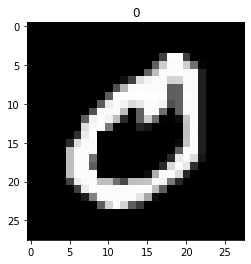

In [ ]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinoimg, y_treinoimg), (X_testeimg, y_testeimg) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinoimg[21], cmap = 'gray')
plt.title(y_treinoimg[21]) #gerou um zero na posicao 21

In [ ]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784, muda de vetor pra matriz
X_treinoimg = X_treinoimg.reshape((len(X_treinoimg), np.prod(X_treinoimg.shape[1:])))
X_testeimg = X_testeimg.reshape((len(X_testeimg), np.prod(X_testeimg.shape[1:])))
X_testeimg[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinoimg = X_treinoimg.astype('float32')
X_testeimg = X_testeimg.astype('float32')

In [ ]:
# Normalização (255 é o valor máximo de um pixel)
X_treinoimg /= 255
X_testeimg /= 255

In [ ]:
# Transformação para o formato dummy (temos 10 classes)
y_treinoimg = np_utils.to_categorical(y_treinoimg, 10)
y_testeimg = np_utils.to_categorical(y_testeimg, 10)
y_testeimg[0] #vetor com posicao do caracter==1

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting(dropouting transf valores iguaal a zero pra ñ ter super ajuste no modelo)
modeloimg = Sequential()
modeloimg.add(Dense(units = 64, activation = 'relu', input_dim = 784)) #densa= conectadas, 64 neuronios dessa camada conectada com 64 da seguinte
modeloimg.add(Dropout(0.2))
modeloimg.add(Dense(units = 64, activation = 'relu'))
modeloimg.add(Dropout(0.2))
modeloimg.add(Dense(units = 64, activation = 'relu'))
modeloimg.add(Dropout(0.2))#20%
#camada de saida, softmax probabilidade
modeloimg.add(Dense(units = 10, activation = 'softmax')) #de 0 a 9 ==10 caracteres de saida

In [ ]:
# Visualização da estrutura da rede neural
modeloimg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy). acurancy 1=teste
modeloimg.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modeloimg.fit(X_treinoimg, y_treinoimg, epochs = 20,
                       validation_data = (X_testeimg, y_testeimg))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4487 - accuracy: 0.8640 - val_loss: 0.1654 - val_accuracy: 0.9503
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2314 - accuracy: 0.9331 - val_loss: 0.1293 - val_accuracy: 0.9616
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1908 - accuracy: 0.9446 - val_loss: 0.1210 - val_accuracy: 0.9654
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1691 - accuracy: 0.9505 - val_loss: 0.1006 - val_accuracy: 0.9718
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1523 - accuracy: 0.9563 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1432 - accuracy: 0.9571 - val_loss: 0.0980 - val_accuracy: 0.9706
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1331 - accuracy: 0.9620 - val_loss: 0.1003 - val_accuracy:

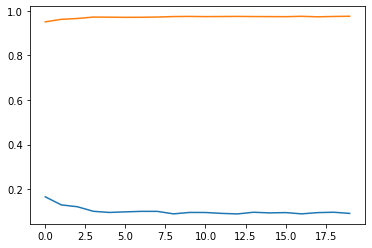

In [ ]:
# Gráfico para visualizar os erros e accuracy == metrica de avaliacao,
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy']) #azul é decorrocada do erro ,performance da rede é laranja

In [ ]:
# Obtenção das previsões 
previsoesimg = modeloimg.predict(X_testeimg)
previsoesimg #termos de prob

313/313 [==============================] - 1s 1ms/step


array([[3.6644542e-11, 6.4317931e-08, 1.8447750e-05, ..., 9.9995786e-01,
        1.1730671e-08, 9.6105086e-06],
       [2.1606818e-14, 1.0763186e-08, 9.9999946e-01, ..., 2.3897477e-09,
        4.7867874e-09, 7.2115512e-16],
       [8.8695338e-13, 9.9995440e-01, 1.2208115e-07, ..., 9.8720886e-07,
        4.1922503e-05, 3.4491791e-08],
       ...,
       [8.4462884e-13, 3.5186210e-09, 4.3216694e-08, ..., 8.1272350e-07,
        3.2789604e-08, 8.4902968e-05],
       [3.0842762e-10, 3.7276981e-14, 5.1157216e-12, ..., 2.8218822e-10,
        4.0832347e-07, 2.7689413e-08],
       [6.2012673e-13, 1.6594048e-21, 8.3877258e-16, ..., 1.0075286e-21,
        1.7398893e-15, 3.8225067e-18]], dtype=float32)

In [ ]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_testeimg] #poe agr max em y_testeimg
y_previsoes_matriz = [np.argmax(t) for t in previsoesimg]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao #diag principal acertou

array([[ 969,    0,    1,    1,    0,    0,    6,    1,    2,    0],
       [   0, 1122,    3,    3,    0,    0,    2,    1,    4,    0],
       [   0,    0, 1010,    5,    1,    1,    3,    3,    9,    0],
       [   1,    0,    2,  994,    0,    2,    0,    5,    3,    3],
       [   1,    0,    4,    0,  954,    0,    6,    1,    0,   16],
       [   4,    0,    0,   15,    1,  857,    8,    0,    6,    1],
       [   4,    3,    0,    1,    2,    3,  941,    0,    3,    1],
       [   2,    5,   10,   10,    2,    0,    0,  988,    2,    9],
       [   5,    0,    3,    3,    5,    2,    6,    3,  943,    4],
       [   3,    4,    0,    7,   10,    1,    0,    5,    2,  977]])

In [ ]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4 
y_treinoimg[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#passo a mesma posição para o modelo prever
novo = X_treinoimg[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modeloimg.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 41ms/step


[4]

In [ ]:
#deep learning II

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
dataset = pd.read_csv("Credit2.csv", sep=";")
dataset

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,good
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,bad
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,good
3,4,<0,existing paid,42,7882,2,4,45,1,2,good
4,5,<0,delayed previously,24,4870,3,4,53,2,2,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,existing paid,12,1736,3,4,31,1,1,good
996,997,<0,existing paid,30,3857,4,4,40,1,1,good
997,998,no checking,existing paid,12,804,4,4,38,1,1,good
998,999,<0,existing paid,45,1845,4,4,23,1,1,bad


In [ ]:
#separação dos variáveis, ignoro primeira pois não tem valor semântico
Xi = dataset.iloc[:,1:10].values #coluna zero fora de checking stts ate num_dep
yd = dataset.iloc[:, 10].values #classe em y
#temos um arry e não mais um data frame
Xi

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [ ]:
#label encoder coluna checking_status, substitui colunas por valores
#atribui valores de zero a 3
labelencoder = LabelEncoder()
Xi[:,0] = labelencoder.fit_transform(Xi[:,0]) #checking stts e o 0 pq ignorou o id
Xi

array([[1, 'critical/other existing credit', 6, ..., 67, 2, 1],
       [0, 'existing paid', 48, ..., 22, 1, 1],
       [3, 'critical/other existing credit', 12, ..., 49, 1, 2],
       ...,
       [3, 'existing paid', 12, ..., 38, 1, 1],
       [1, 'existing paid', 45, ..., 23, 1, 1],
       [0, 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [ ]:
#one hot encoder coluna credit_history, criar uma col pra cada um dos 5 valores possiveis , restante tera zero
#deve adicionar 5 colunas
onehotencoder = make_column_transformer((OneHotEncoder(categories='auto', sparse=False), [1]), remainder="passthrough")
Xi = onehotencoder.fit_transform(Xi)
Xi

array([[0.0, 1.0, 0.0, ..., 67, 2, 1],
       [0.0, 0.0, 0.0, ..., 22, 1, 1],
       [0.0, 1.0, 0.0, ..., 49, 1, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 38, 1, 1],
       [0.0, 0.0, 0.0, ..., 23, 1, 1],
       [0.0, 1.0, 0.0, ..., 27, 1, 1]], dtype=object)

In [ ]:
#Excluimos a variável para evitar a dummy variable trap
Xi = Xi[:,1:]
Xi

array([[1.0, 0.0, 0.0, ..., 67, 2, 1],
       [0.0, 0.0, 1.0, ..., 22, 1, 1],
       [1.0, 0.0, 0.0, ..., 49, 1, 2],
       ...,
       [0.0, 0.0, 1.0, ..., 38, 1, 1],
       [0.0, 0.0, 1.0, ..., 23, 1, 1],
       [1.0, 0.0, 0.0, ..., 27, 1, 1]], dtype=object)

In [ ]:
#Laber encoder com a classe pra transf em valores 0  e 1
labelencoder_Y = LabelEncoder()
yd = labelencoder_Y.fit_transform(yd)
yd

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
#separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(Xi, yd, test_size = 0.2, random_state = 0)
print(len(X_train),len(X_test),len(y_train),len(y_test))

800 200 800 200


In [ ]:
#Feature Scalling, Padronização z-score(processo preferencial em relacao a minimax)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test #dados em msm escala

array([[-0.65270587, -0.30966177,  0.95357636, ..., -0.50870719,
        -0.71596668, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ..., -0.85315557,
        -0.71596668,  2.36887531],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.61075002,
        -0.71596668, -0.42214126],
       ...,
       [ 1.53208366, -0.30966177, -1.04868371, ...,  0.26630165,
         1.04100677, -0.42214126],
       [-0.65270587,  3.22932987, -1.04868371, ...,  0.52463793,
         4.55495365, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.52463793,
        -0.71596668,  2.36887531]])

In [ ]:
classifier = Sequential() #rn do sequencial
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) #segunda camada densa
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #camada de saida com 1 neuronio ,pois e 0 ou 1
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100) #atualiza a cada batch_size

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.6988
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6975
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.6975
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.6975
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.6975
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.6975
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.6975
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.6975
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.6975
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.6975
Epoch 11/

In [ ]:
y_pred = classifier.predict(X_test) #previsao em termos de prob
y_pred = (y_pred > 0.5) #transf em TorF pra gerar matriz de confusao
y_pred

7/7 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [ ]:
#matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 22,  36],
       [ 20, 122]])

In [ ]:
#GRAFOS

In [ ]:
!apt install libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 21 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpixman-1-dev amd64 0.34.0-2ubuntu0.1 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libxcb-shm0-dev amd6

In [ ]:
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.23.0-cp38-cp38-linux_x86_64.whl size=297239 sha256=161ae6e517536d88ddb025ed6e5986b8ceee952b2d3b3265b57adf740f2637c1
  Stored in directory: /root/.cache/pip/wheels/d9/25/86/ba7950c33840b1fda7ab932c7c7172d77b994807c5fd35c3ea
Successfully built pycairo


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Importação das bibliotecas
from igraph import Graph
from igraph import plot
import matplotlib.pyplot as plt


In [ ]:
# Definição do grafo com as arestas
grafo1 = Graph(edges = [(0,1),(1,2),(2,3),(3,0)], directed = True)
# Definição do rótulo de cada vértice
grafo1.vs['label'] = range(grafo1.vcount()) #contagem é o rotulo dos vertices
print(grafo1) #grafico é direcionado, de 4 vert e 4 arestas

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


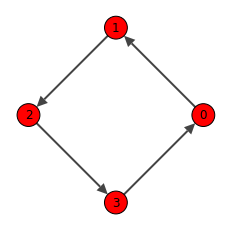

In [ ]:
#gráfico
#gráfico
#plot(grafo1, bbox = (0,0,300,300) 
plot(grafo1, target=plt.axes())


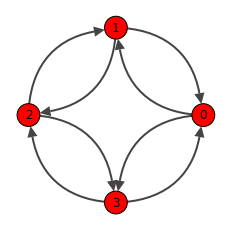

In [ ]:
# Criação do segundo grafo
grafo2 = Graph(edges = [(0,1),(1,2),(2,3),(3,0),(0,3),(3,2),(2,1),(1,0)], directed = True) #direcionado 
grafo2.vs['label'] = range(grafo2.vcount())
plot(grafo2, # Grafo com Laço
grafo3 = Graph(edges = [(0,1),(1,2),(2,3),(3,0),(1,1)], directed = True)
grafo3.vs['label'] = range(grafo3.vcount())
plot(grafo3, target=plt.axes()) #devido erro do igraph na lib só roda com o target=plt.axes()

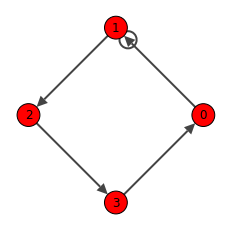

In [ ]:
# Grafo com Laço
grafo3 = Graph(edges = [(0,1),(1,2),(2,3),(3,0),(1,1)], directed = True)#(1,1)é um laço ,pois aresta liga o vertice com si msm
grafo3.vs['label'] = range(grafo3.vcount())
plot(grafo3, target=plt.axes())

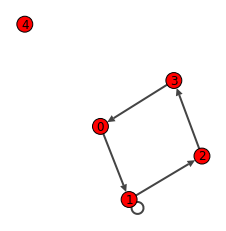

In [ ]:
# Criação do quarto grafo
grafo4 = Graph(edges = [(0,1),(1,2),(2,3),(3,0),(1,1)], directed = True) 
# adicionamos vertice isolado, não faz conexao
grafo4.add_vertex(5)
grafo4.vs['label'] = range(grafo4.vcount())
plot(grafo4,target=plt.axes())

In [2]:
!apt install libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 21 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpixman-1-dev amd64 0.34.0-2ubuntu0.1 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libxcb-shm0-dev amd6

In [3]:
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.6/344.6 KB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.23.0-cp38-cp38-linux_x86_64.whl size=297285 sha256=5ea1ac23f51b30545a0037148925fe4a4c5a344df56e7fff682b82d551c74d02
  Stored in directory: /root/.cache/pip/wheels/d9/25/86/ba7950c33840b1fda7ab932c7c7172d77b994807c5fd35c3ea
Successfully built pycairo


In [4]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.4 MB/s eta 0:00:00


In [5]:
# Importação das bibliotecas
from igraph import Graph
from igraph import plot


In [6]:
# Definição do grafo com as arestas
grafo5 = Graph(edges = [(0,1),(1,2),(2,3),(3,0)], directed = True) #torna direcionado
# Direcao entre as arestas indicado por D no print
grafo5.vs['label'] = range(grafo5.vcount()) #contagem é o rotulo dos vertices
print(grafo5) #grafico é direcionado, de 4 vert e 4 arestas

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


In [7]:
grafo6 = Graph(edges = [(0,1),(1,2),(2,3),(3,0)], directed = False) #torna NÃO direcionado
# Ñ DIRECIONADO indicado por U no print
grafo6.vs['label'] = range(grafo6.vcount()) #contagem é o rotulo dos vertices
print(grafo6) #grafico é direcionado, de 4 vert e 4 arestas

IGRAPH U--- 4 4 --
+ attr: label (v)
+ edges:
0--1 1--2 2--3 0--3


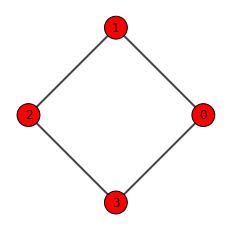

In [10]:
plot(grafo6,target=plt.axes())#ñ direcionado ñ há setas no grafo

IGRAPH UN-- 11 4 --
+ attr: label (v), name (v)
+ edges (vertex names):
None--None, None--None, None--None, None--None


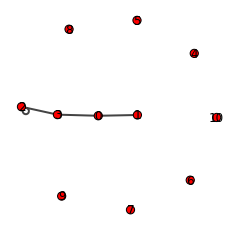

In [20]:
# Adicionando vértices e arestas por meio das funções add_vertices e add_vertex
grafo3 = Graph(directed = False)
grafo3.add_vertices(10)
grafo3.add_vertex(16) #add apenas 1 vertice
grafo3.add_edges([(0,1),(2,2),(2,3),(3,0)]) #4 arestas definida 
grafo3.vs['label'] = range(grafo3.vcount())
print(grafo3)
plot(grafo3,target=plt.axes())

IGRAPH UN-- 7 7 --
+ attr: label (v), name (v)
+ edges (vertex names):
None--None, None--None, None--None, None--None, None--None, None--None,
None--None


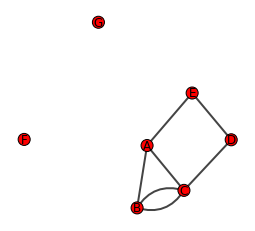

In [21]:
grafo3 = Graph(directed = False)
grafo3.add_vertices(5)
#grafo3.add_vertex(16) 
grafo3.add_edges([(0,1),(1,2),(2,3),(3,4),(4,0),(0,2),(2,1)]) #edges para os 5 primeiros criados
grafo3.add_vertex(5) 
grafo3.add_vertex(6) 
grafo3.vs['label'] = ['A','B','C','D','E','F','G']
print(grafo3)
plot(grafo3,target=plt.axes())

In [22]:
# recriamos o grafo 4
grafo71 = Graph(directed = False)
grafo71.add_vertices(5)
grafo71.add_edges([(0,1),(1,2),(2,3),(3,4),(4,0),(0,2),(2,1)])
grafo71.add_vertex(5)
grafo71.add_vertex(6)
grafo71.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grafo71.vs['name'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [24]:
# Impressão da matriz de adjacência,possivel acessar elementos pontuais
print(grafo71.get_adjacency())

[[0, 1, 1, 0, 1, 0, 0]
 [1, 0, 2, 0, 0, 0, 0]
 [1, 2, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 1, 0, 0]
 [1, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0]]


In [26]:
# linha
grafo71.get_adjacency()[0,]

[0, 1, 1, 0, 1, 0, 0]

In [27]:
#linha e coluna
grafo71.get_adjacency()[0,1]

1

In [28]:
# Estrutura de repetição para percorrer cada vértice, visualizando o nome e o rótulo,sendo nome propridade interna
for v in grafo71.vs:
   print(v) 

igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 0, {'name': 'A', 'label': 'A'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 1, {'name': 'B', 'label': 'B'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 2, {'name': 'C', 'label': 'C'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 3, {'name': 'D', 'label': 'D'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 4, {'name': 'E', 'label': 'E'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 5, {'name': 'F', 'label': 'F'})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30540>, 6, {'name': 'G', 'label': 'G'})


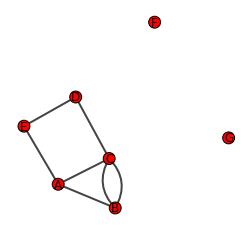

In [31]:
plot(grafo71,target=plt.axes())

In [32]:
# Criação de grafo com pesos entre as relações
grafo51 = Graph(edges = [(0,1),(2,3),(0,2),(0,3)], directed = True)
grafo51.vs['label'] = ['Fernando', 'Pedro', 'Jose', 'Antonio']
grafo51.vs['peso'] = [40,30,30,25]
print(grafo5)

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


In [33]:
# Percorrer os vértices para visualizar os pesos
for v in grafo51.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x7fa821ecde40>, 0, {'label': 'Fernando', 'peso': 40})
igraph.Vertex(<igraph.Graph object at 0x7fa821ecde40>, 1, {'label': 'Pedro', 'peso': 30})
igraph.Vertex(<igraph.Graph object at 0x7fa821ecde40>, 2, {'label': 'Jose', 'peso': 30})
igraph.Vertex(<igraph.Graph object at 0x7fa821ecde40>, 3, {'label': 'Antonio', 'peso': 25})


In [34]:
grafo51.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7fa821ecde40>, 0, {'label': 'Fernando', 'peso': 40})

In [35]:
# Definição do tipo de amizado e do peso das relações
grafo51.es['TipoAmizade'] = ['Amigo', 'Inimigo', 'Inimigo', 'Amigo']
grafo51.es['weight'] = [1,2,1,3]#torna o grafico ponderado
print(grafo5)

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


In [36]:
# Percorrer os vértices, tipo de amizade
for e in grafo51.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x7fa821ecde40>, 0, {'TipoAmizade': 'Amigo', 'weight': 1})
igraph.Edge(<igraph.Graph object at 0x7fa821ecde40>, 1, {'TipoAmizade': 'Inimigo', 'weight': 2})
igraph.Edge(<igraph.Graph object at 0x7fa821ecde40>, 2, {'TipoAmizade': 'Inimigo', 'weight': 1})
igraph.Edge(<igraph.Graph object at 0x7fa821ecde40>, 3, {'TipoAmizade': 'Amigo', 'weight': 3})


In [38]:
#propriedades e valores de uma posição
grafo51.es[0]

igraph.Edge(<igraph.Graph object at 0x7fa821ecde40>, 0, {'TipoAmizade': 'Amigo', 'weight': 1})

In [40]:
# tipos de amizade
grafo51.es['TipoAmizade'] #ver aresta=propriedade tipo de amizade

['Amigo', 'Inimigo', 'Inimigo', 'Amigo']

In [41]:
print(grafo51) #d w indicam que é direcionado e ponderado

IGRAPH D-W- 4 4 --
+ attr: label (v), peso (v), TipoAmizade (e), weight (e)
+ edges:
0->1 2->3 0->2 0->3


IGRAPH DNWT 4 4 --
+ attr: label (v), name (v), peso (v), type (v), TipoAmizade (e), weight (e)
+ edges (vertex names):
Amizades->Amizades, Amizades->Amizades, Amizades->Amizades, Amizades->Amizades


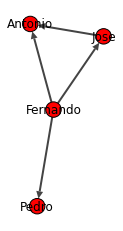

In [44]:
# Mudança dos tipos das relações em grafos já existentes
grafo51.vs['type'] = 'Humanos'
grafo51.vs['name'] = 'Amizades'
print(grafo51)
plot(grafo51, target=plt.axes())

In [45]:
# Criação de grafo com pesos entre as relações
grafo52 = Graph(edges = [(0,1),(2,3),(0,2),(0,3)], directed = True)
grafo52.vs['label'] = ['Fernando', 'Pedro', 'Jose', 'Antonio'] #vs pra acessar vertices,ponto tem o nome
grafo52.vs['peso'] = [40,30,30,25]
grafo52.es['TipoAmizade'] = ['Amigo', 'Inimigo', 'Inimigo', 'Amigo'] #es para as arestas, tipo de amizade fica na relaçao
grafo52.es['weight'] = [1,2,1,3]

In [46]:
# Visualizar informações sobre os vértices
for v in grafo52.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x7fa821d30240>, 0, {'label': 'Fernando', 'peso': 40})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30240>, 1, {'label': 'Pedro', 'peso': 30})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30240>, 2, {'label': 'Jose', 'peso': 30})
igraph.Vertex(<igraph.Graph object at 0x7fa821d30240>, 3, {'label': 'Antonio', 'peso': 25})


In [47]:
# Visualizar informações sobre as arestas
for e in grafo52.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x7fa821d30240>, 0, {'TipoAmizade': 'Amigo', 'weight': 1})
igraph.Edge(<igraph.Graph object at 0x7fa821d30240>, 1, {'TipoAmizade': 'Inimigo', 'weight': 2})
igraph.Edge(<igraph.Graph object at 0x7fa821d30240>, 2, {'TipoAmizade': 'Inimigo', 'weight': 1})
igraph.Edge(<igraph.Graph object at 0x7fa821d30240>, 3, {'TipoAmizade': 'Amigo', 'weight': 3})


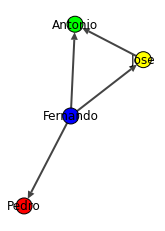

In [48]:
# Definição de cores para os vértices
grafo52.vs['cor'] = ['blue', 'red', 'yellow', 'green']
plot(grafo52, target=plt.axes(),vertex_color = grafo52.vs['cor'])#vertex_color é para referencia as cores 

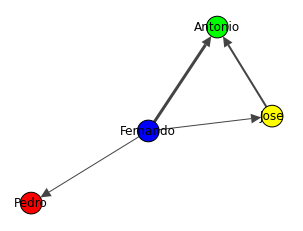

In [52]:
# pesos para as arrestas
plot(grafo52,target=plt.axes()  
,edge_width = grafo52.es['weight']
,vertex_color = grafo52.vs['cor'])

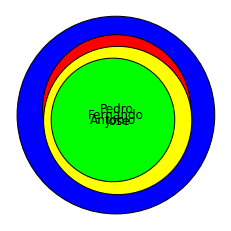

In [55]:
# Pesos para os vértices#parametro da impressao o size
plot(grafo52, target=plt.axes(), vertex_size = grafo52.vs['peso'],
     edge_width = grafo52.es['weight'],
     vertex_color = grafo52.vs['cor'])

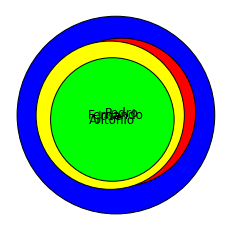

In [56]:
# Curvatura varias arestas com angulo diferente pra ñ tranpostar , bom para rotas entre duas cidades por exemplo
plot(grafo52, target=plt.axes(), vertex_size = grafo52.vs['peso'],
     edge_width = grafo52.es['weight'],
     vertex_color = grafo52.vs['cor'],
     edge_curved = 0.4)#defini propriedade com curved  e define angulatura

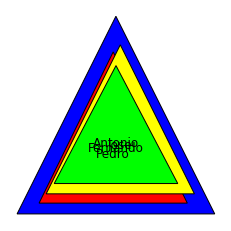

In [58]:
# Formato, mudando de um circulo p um triangulo
plot(grafo52, target=plt.axes(), vertex_size = grafo52.vs['peso'],
     edge_width = grafo52.es['weight'],
     vertex_color = grafo52.vs['cor'],
     edge_curved = 0.4, vertex_shape = 'triangle')#pode ate por imagens aq

In [60]:
# Importação das bibliotecas
#from igraph import Graph
#from igraph import plot

In [62]:
!apt install libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [63]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from igraph import Graph
from igraph import plot

In [ ]:
# Carregamento de grafo no formato graphml
#grafo33 = igraph.load('Grafo.graphml') ERRO IMPOSSIBILITOU CONTINUACAO
#print(grafo33)

In [68]:
# Criação de grafo direcionado com pesos entre as arestas
grafo44 = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)],
                       directed = True)
grafo44.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] #cada label é um local
grafo44.es['weight'] = [2,1,2,1,2,1,3,1] #representam distancias

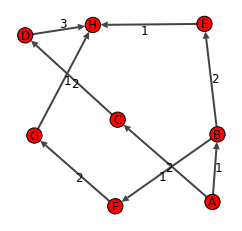

In [69]:
# Visualização do grafo com os pesos,grafo direcionado como mapa , ñ pode andar qlqr direcao
plot(grafo44, target=plt.axes(), edge_label = grafo44.es['weight'])

In [70]:
# Caminho entre os vértices A - H, calcular menor caminho e essa dist entre vertices
caminho_vertice = grafo44.get_shortest_paths(0,7, output = 'vpath') #usa os indices pra tracar caminho +curto
for n in caminho_vertice[0]:
    print(grafo44.vs[n]['label']) #imprimindo caminho + curto pelas labels

A
B
E
H


In [71]:
# Obtenção dos caminhos mais curtos entre 0 e 7, buscando caminho + curto pelo indice das arestas
caminho_aresta = grafo44.get_shortest_paths(0,7, output = 'epath')
caminho_aresta

[[1, 2, 7]]

In [74]:
# Mostrar o caminho 
caminho_aresta_id = []
for n in caminho_aresta[0]:
    caminho_aresta_id.append(n)
caminho_aresta_id

# Somatório dos pesos (ou distâncias) entre os vértices do caminho
distancia = 0
for e in grafo44.es:
    #print(e.index)
    if e.index in caminho_aresta_id:
        distancia += grafo44.es[e.index]['weight']
distancia     

4

In [75]:
# Criação de um gráfico direcionado com pesos entre as arestas
grafo44 = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)],
                       directed = True)
grafo44.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo44.es['weight'] = [2,1,2,1,2,1,3,1]

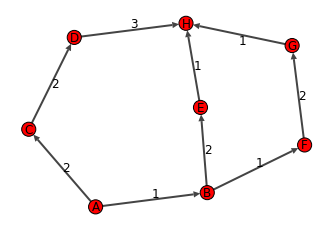

In [76]:
# Visualização dos resultados
plot(grafo44, target=plt.axes(), edge_label = grafo44.es['weight'])

In [77]:
# Menor caminho entre A - H (retorna os vértices), retornando os vertices  0==A e 7==H
caminho_vertice = grafo44.get_shortest_paths(0,7, output = 'vpath')
caminho_vertice

[[0, 1, 4, 7]]

In [78]:
# Retorna as arestas que ligam os dois vértices epath retorna arestas
caminho_aresta = grafo44.get_shortest_paths(0,7, output = 'epath')
caminho_aresta

[[1, 2, 7]]

In [79]:
# Mostra o ID dos vértices que fazem parte do caminho, cria lista vazia percorre obj das aresta e exibe indentificadores
caminho_aresta_id = []
for n in caminho_aresta[0]:
    caminho_aresta_id.append(n)
caminho_aresta_id

[1, 2, 7]

In [82]:
# Mostra o nome dos vértices que fazem parte do caminho
caminho_nome_vertices = []
for n in caminho_vertice[0]:
    print(grafo44.vs[n]['label'])
    caminho_nome_vertices.append(grafo44.vs[n]['label'])
caminho_nome_vertices    

A
B
E
H


['A', 'B', 'E', 'H']

In [84]:
# Colorir os vértices do caminho, percorre vertices do grafo se grafo q laço ta passando esta entre os labels do caminho==green se ñ=grey
for v in grafo44.vs:
    #print(v)
    if v['label'] in caminho_nome_vertices:
        v['color'] = 'green'
    else:
        v['color'] = 'gray'

In [85]:
# Colorir as arestas do caminho
for e in grafo44.es:
    #print(e)
    if e.index in caminho_aresta_id:
        e['color'] = 'green'
    else:
        e['color'] = 'gray'

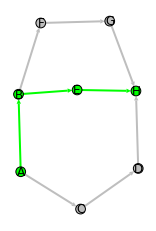

In [86]:
plot(grafo44,target=plt.axes()) #exibicao do caminho colorido

In [ ]:
#exemplo 2

In [88]:
# Criação de grafo direcionado com pesos nas arestas
grafo2 = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)],
                       directed = True)
grafo2.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo2.es['weight'] = [2,1,2,1,2,1,3,1]

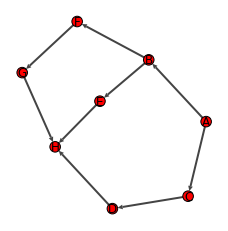

In [89]:
# Visualização do grafo
plot(grafo2, target=plt.axes())

In [90]:
# Visualização de comunidades e em qual comunidade cada registro foi associado
comunidades2 = grafo2.clusters()
print(comunidades2)
comunidades2.membership

Clustering with 8 elements and 8 clusters
[0] 0
[1] 2
[2] 3
[3] 1
[4] 5
[5] 6
[6] 4
[7] 7


<ipython-input-90-cafe802301ad>:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  comunidades2 = grafo2.clusters()


[0, 3, 1, 2, 6, 4, 5, 7]

In [91]:
# Função mais otimizada para visualização das comunidades
c = grafo2.community_edge_betweenness()
print(c)
# Obtenção do número de clusters
c.optimal_count
# Visualização da nova comunidade
comunidades3 = c.as_clustering()
print(comunidades3)
comunidades3.membership

Dendrogram, 8 elements, 7 merges

7 4 3 6 5 1 2 0
| | | | | | | |
`-' | | | | | |
 |  | | | | | |
 `--' | | | | |
  |   | | | | |
  `---' `-' `-'
    |    |   | 
    `----'   | 
      |      | 
      `------'
Clustering with 8 elements and 3 clusters
[0] 0, 2
[1] 1, 5
[2] 3, 4, 6, 7


[0, 1, 0, 2, 2, 1, 2, 2]